In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [110]:
# Loading data
df_cust = pd.read_csv('dim_customers.csv')
df_spend = pd.read_csv('fact_spends.csv')

In [111]:
df_cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [112]:
df_spend.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [113]:
df_cust.shape

(4000, 7)

In [114]:
df_spend.shape

(864000, 5)

In [115]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [116]:
df_cust.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


In [118]:
df_cust.describe(include = 'O')

,customer_id,age_group,city,occupation,gender,marital status
count,4000,4000,4000,4000,4000,4000
unique,4000,4,5,5,2,2
top,ATQCUS1825,25-34,Mumbai,Salaried IT Employees,Male,Married
freq,1,1498,1078,1294,2597,3136


In [119]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [120]:
df_spend.describe()

,spend
count,864000.000000
mean,614.464994
std,661.571676
min,6.000000
25%,191.000000
50%,395.000000
75%,793.000000
max,10313.000000


In [121]:
df_spend.describe(include = 'O')

,customer_id,month,category,payment_type
count,864000,864000,864000,864000
unique,4000,6,9,4
top,ATQCUS1371,July,Health & Wellness,Credit Card
freq,216,144000,96000,216000


In [122]:
df_cust.count()

customer_id       4000
age_group         4000
city              4000
occupation        4000
gender            4000
marital status    4000
avg_income        4000
dtype: int64

In [123]:
df_spend.count()

customer_id     864000
month           864000
category        864000
payment_type    864000
spend           864000
dtype: int64

In [124]:
df_cust.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [125]:
df_spend.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [126]:
# No missing values for both tables

# combining table and income unitilisation

In [127]:
# Calculate total spend per customer in table2
total_spend_per_customer = df_spend.groupby('customer_id')['spend'].sum().reset_index()

# Calculate count of unique months per customer in table2
count_months_per_customer = df_spend.groupby('customer_id')['month'].nunique().reset_index()
count_months_per_customer.rename(columns={'month': 'unique_month_count'}, inplace=True)

# Merge the results back to table1
merged_table1 = pd.merge(df_cust, total_spend_per_customer, on='customer_id', how='left')
df_final = pd.merge(merged_table1, count_months_per_customer, on='customer_id', how='left')

# Calculate AverageSpendPerMonth
df_final['average_spend'] = (df_final['spend'] / df_final['unique_month_count']).round(2)
df_final.drop(['spend', 'unique_month_count'], axis=1, inplace=True)


In [128]:
df_final[df_final['customer_id'] == 'ATQCUS0008']

,customer_id,age_group,city,occupation,gender,marital status,avg_income,average_spend
774,ATQCUS0008,21-24,Mumbai,Salaried IT Employees,Male,Married,46854,26162.17


In [129]:
#Income utilisation
# Calculate the percentage and create a new column 'c3'
df_final['avg_income_utils'] = (df_final['average_spend'] / df_final['avg_income'] )

In [130]:
df_final.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,average_spend,avg_income_utils
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.67,0.440688
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.67,0.413774
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.00,0.305475
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.83,0.376869
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.00,0.431738


# Occupation

In [131]:
# Unique age values
df_final["occupation"].unique()

array(['Salaried IT Employees', 'Salaried Other Employees',
       'Government Employees', 'Freelancers', 'Business Owners'],
      dtype=object)

In [132]:
label_encoder = preprocessing.LabelEncoder() 
 
df_final["occupation_encoded"]= label_encoder.fit_transform(df_final["occupation"]) 

df_final["occupation_encoded"].unique() 


array([3, 4, 2, 1, 0])

# Age

In [133]:
df_final["age_encoded"]= label_encoder.fit_transform(df_final["age_group"]) 

df_final["age_encoded"].unique() 

array([3, 1, 0, 2])

# Gender

In [134]:
df_final["gender_encoded"]= label_encoder.fit_transform(df_final["gender"]) 

df_final["gender_encoded"].unique() 

array([1, 0])

# Marital status

In [135]:
df_final["marital_status_encoded"]= label_encoder.fit_transform(df_final["marital status"]) 

df_final["marital_status_encoded"].unique() 

array([0, 1])

# City

In [136]:
df_final["city_encoded"]= label_encoder.fit_transform(df_final["city"]) 

df_final["city_encoded"].unique() 

array([0, 3, 1, 2, 4])

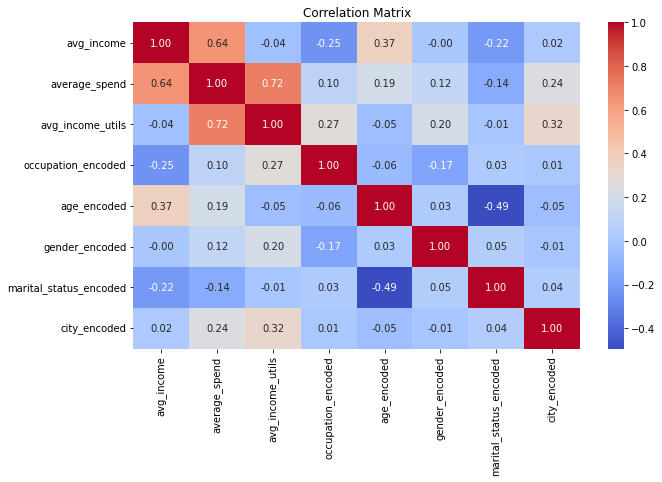

In [137]:
# Create the correlation matrix
correlation_matrix = df_final.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [141]:
# Step 2: Standardize the data
scaler = StandardScaler()
df_final['avg_income_utils_scaled'] = scaler.fit_transform(df_final[['avg_income_utils']])
df_final['average_spend_scaled'] = scaler.fit_transform(df_final[['average_spend']])
df_final['avg_income_scaled'] = scaler.fit_transform(df_final[['avg_income']])

In [142]:
df_final.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,average_spend,avg_income_utils,occupation_encoded,age_encoded,gender_encoded,marital_status_encoded,city_encoded,avg_income_utils_scaled,average_spend_scaled,avg_income_scaled
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.67,0.440688,3,3,1,0,0,0.091029,1.121828,1.488665
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.67,0.413774,4,1,1,0,3,-0.127573,-0.611343,-0.798937
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.00,0.305475,4,1,1,0,1,-1.007206,-1.157165,-0.950078
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.83,0.376869,2,1,1,0,2,-0.427324,-0.189436,0.165640
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.00,0.431738,1,0,1,1,0,0.018339,-1.077065,-1.585005


# Feature selection

In [143]:
df_final.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'average_spend', 'avg_income_utils',
       'occupation_encoded', 'age_encoded', 'gender_encoded',
       'marital_status_encoded', 'city_encoded', 'avg_income_utils_scaled',
       'average_spend_scaled', 'avg_income_scaled'],
      dtype='object')

In [208]:
X = df_final.drop(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'average_spend', 'avg_income_utils','avg_income_utils_scaled'], axis = 1)


In [209]:
# Specify the desired column order
desired_column_order = ['occupation_encoded','age_encoded','gender_encoded', 'marital_status_encoded','city_encoded','average_spend_scaled', 'avg_income_scaled']

# Reassign the DataFrame with the new column order
X = X[desired_column_order]

In [210]:
wcss = []

for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\mdzak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdzak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdzak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mdzak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

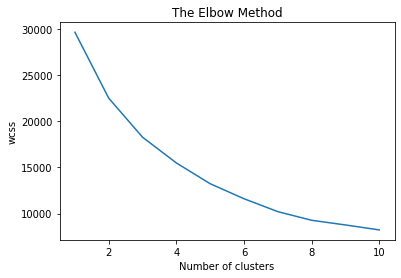

In [211]:
wcss#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [232]:
#Build model
kmeansmodel = KMeans(n_clusters= 4, init='k-means++')
y_kmeans= kmeansmodel.fit(X)

C:\Users\mdzak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [233]:
labels=kmeansmodel.labels_

In [234]:
clusters=pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,occupation_encoded,age_encoded,gender_encoded,marital_status_encoded,city_encoded,average_spend_scaled,avg_income_scaled,cluster
0,3,3,1,0,0,1.121828,1.488665,3
1,4,1,1,0,3,-0.611343,-0.798937,1
2,4,1,1,0,1,-1.157165,-0.950078,3
3,2,1,1,0,2,-0.189436,0.165640,0
4,1,0,1,1,0,-1.077065,-1.585005,0


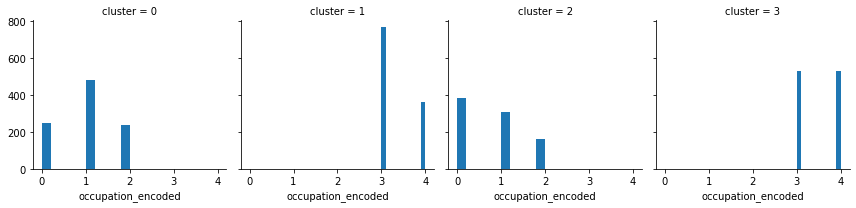

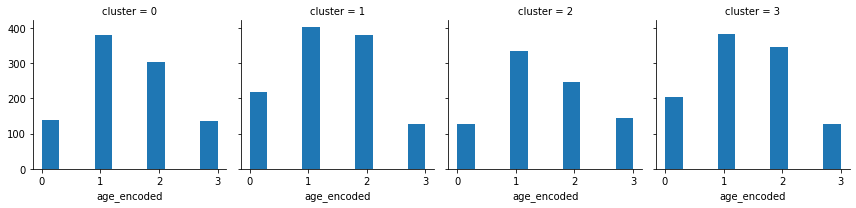

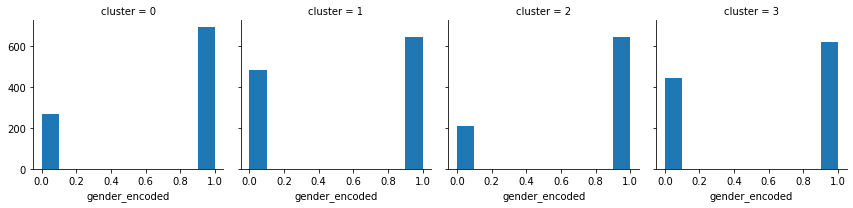

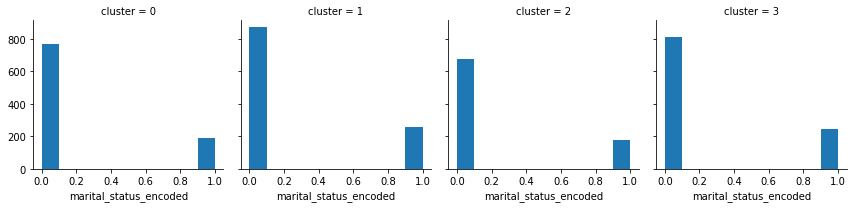

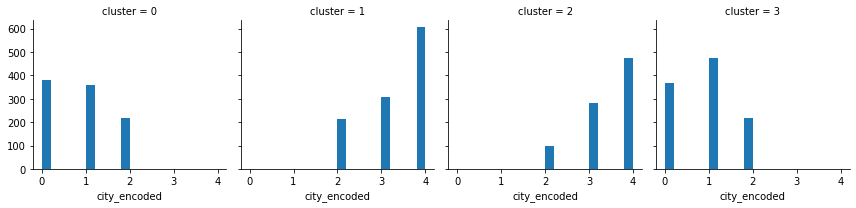

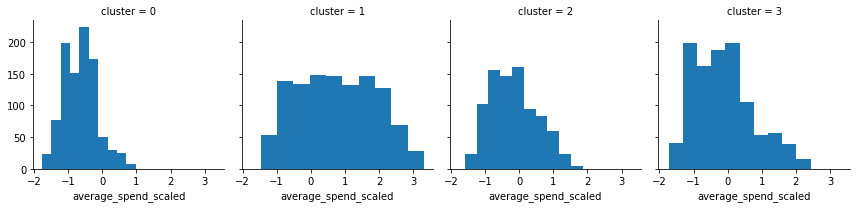

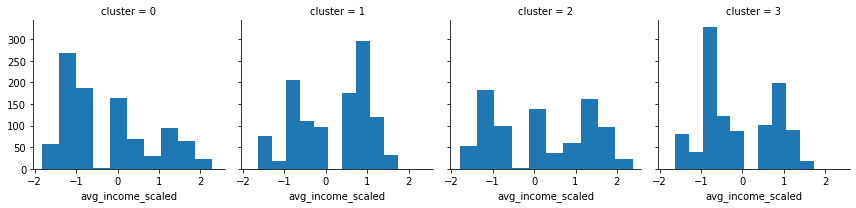

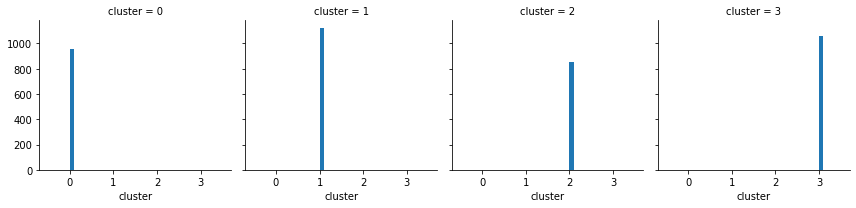

In [235]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [236]:
clusters['cluster'].value_counts()

1    1126
3    1061
0     959
2     854
Name: cluster, dtype: int64

In [248]:
df_cust_final=pd.concat([df_final, pd.DataFrame({'cluster':labels})], axis=1)


In [249]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              4000 non-null   object 
 1   age_group                4000 non-null   object 
 2   city                     4000 non-null   object 
 3   occupation               4000 non-null   object 
 4   gender                   4000 non-null   object 
 5   marital status           4000 non-null   object 
 6   avg_income               4000 non-null   int64  
 7   average_spend            4000 non-null   float64
 8   avg_income_utils         4000 non-null   float64
 9   occupation_encoded       4000 non-null   int32  
 10  age_encoded              4000 non-null   int32  
 11  gender_encoded           4000 non-null   int32  
 12  marital_status_encoded   4000 non-null   int32  
 13  city_encoded             4000 non-null   int32  
 14  avg_income_utils_scaled 

In [250]:
# # Assuming 'merged_df' is the merged DataFrame
# df_cust_final.to_csv('dim_customers_updated.csv', index=False)


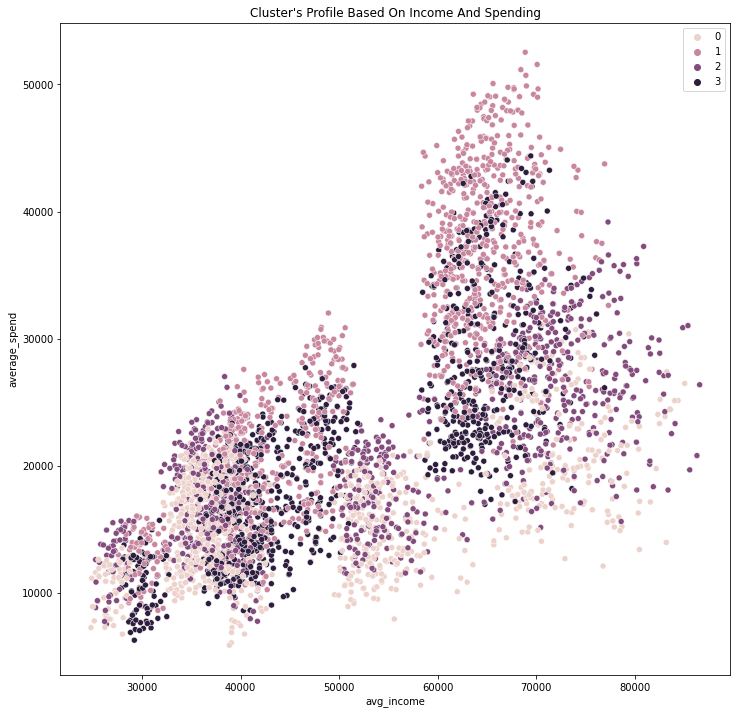

In [251]:

plt.figure(figsize=(12, 12))
pl = sns.scatterplot(data = df_cust_final,x=df_cust_final["avg_income"], y=df_cust_final["average_spend"],hue=df_cust_final["cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

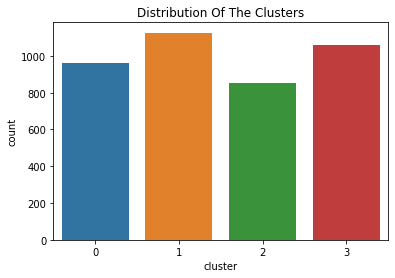

In [241]:
pl = sns.countplot(x=df_cust_final["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [242]:
df_cust_final.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,average_spend,avg_income_utils,occupation_encoded,age_encoded,gender_encoded,marital_status_encoded,city_encoded,avg_income_utils_scaled,average_spend_scaled,avg_income_scaled,cluster
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.67,0.440688,3,3,1,0,0,0.091029,1.121828,1.488665,3
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.67,0.413774,4,1,1,0,3,-0.127573,-0.611343,-0.798937,1
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.00,0.305475,4,1,1,0,1,-1.007206,-1.157165,-0.950078,3
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.83,0.376869,2,1,1,0,2,-0.427324,-0.189436,0.165640,0
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.00,0.431738,1,0,1,1,0,0.018339,-1.077065,-1.585005,0
